## Identification.

Name: Matheus T. de Laurentys

NUSP: 9793714

## Name of the dataset
Dataset: Women's Shoe Prices

## Abstract
Abstract of the dataset (describe the dataset with your own words):

The Women's Shoe Prices dataset is a collection that lists sevral different shoe models and some information about it. 

## Questions to the dataset
~~Question 1: What are the shoe categories with the largest seasonal(witer/summer/...) differences in price?~~
(Shoe Categories do not represent what we expected)

~~Question 2: What is the percentage of sellers that sell more than 60% of their years sellings in a single season?~~
(Merchants Data listed on the pdf is not present in this dataset)

Question 1: What is the percentage of shoes which the prices changed?

Question 2: What is the number of shoes which there is difference between the minimum and maximum prices? 

Question 3: What are the months entries count throughout the years?

## EDA
Present your EDA strategy:
1. Checked which columns represented categories instead of values
1. From the data columns made a trnalation unity if needed (example: 6 BM US -> size 6, medium width)
1. I "fixed" some of the data that has "non-uniform" data so I can later annalyze it (size)
1. I organize the data I will focus in categorical vs numerical so I can easily treat them
1. I followed the order suggested by the list below (leaving the item 5 last)

For the coding part:
* I left dictionaries, enums and auxiliriary methods in the beggining to ease the readability later on
* I do not keep much unnecessary data available, but that can be easily changed, and have the values verified

## Some examples of analysis/visualizations:

1) Present the mean, variance, min, median and max values for each attribute. If the dataset has too many attibutes, choose the more significant ones. Present your code and some remarks to help the understanding.

2) How well distributed are the dataset in relation the each attribute. How can you visually check that? Hint: plot a histogram

3) Is there any attribute that can be used to better interpret the dataset? Show this in a graphic where you used this attribute to group (groupby) the data.

4) Is there any outlier's pattern? 

5) Make your own remarks about the dataset. Try to use one or more graphics to justify your remarks.

6) Is there any symmetry that can be stressed?

7) How important was EDA to help you understand the dataset?

## 0. Importing DataSet, Helper Code and Data Cleanup

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace
from enum import Enum

data_raw_19 = pd.read_csv("Datafiniti_Womens_Shoes_Jun19.csv")
data_raw_1 = pd.read_csv("7210_1.csv", low_memory=False)

aux = ['0','1','2','3','4','5','6','7','8','9']
aux2 = ['0','1','2','3','4','5','6','7','8','9', '.']
def extract_size(s):
    a = list(s)
    b = []
    l = len(a)
    for i in range(l):
        if (a[i] in aux):
            while(i < l and a[i] in aux2):
                b.append(a[i])
                i += 1
            f = ''.join(b)
            return float(f)
        
        
def barplot(df, col_name):
    name = "up to the 10 most significants " + col_name
    ax = df[col_name].value_counts().head(10).plot(kind='bar',
                                    figsize=(30,8),
                                    title=name)
def distPlot(df, col_name):
    name = "Distribution of " + col_name
    ax = df.groupby('id').first()[col_name].plot.kde(title=name)
    if(col_name == 'prices.size'): ax.set_xlim(-1.0, 20.0)
    else: ax.set_xlim(-5.0, 1500.0)

        
data_fix = data_raw_19
data_fix['prices.size'] = data_fix['prices.size'].apply(lambda x : extract_size(x))

class col_raw (Enum):
    ids = 0
    brand = 4
    categories = 5
    primaryCategories = 6
    colors = 7
    p_amt_max = 15
    p_amt_min = 16
    p_colors = 18
    p_size = 28
    #sizes = 30
    
numericals = [
    col_raw.p_amt_max.value,
    col_raw.p_amt_min.value,
    col_raw.p_size.value
    #col_raw.sizes.value
]

categorical = [
    col_raw.brand.value,
    col_raw.primaryCategories.value,
    col_raw.categories.value,
    col_raw.p_colors.value,
    col_raw.colors.value
]

## 1. Mean, variance, min, median and max values for each "important" attribute

#### Numerical Values
1. Prices.amountMax
2. Prices.amountMin
4. Sizes

#### Categorical Values
1. Brand
2. primaryCategories
3. Colors
4. Categories
5. Prices.colors

#### Ignored Entries
* Ean
* Asins
* ID
* Date Added
* Date Updated
* imageURLs
* Keys
* manufacturer (86% is null)
* manufacturerNumber (86% is null)
* name
* prices.condition
* Prices.size 


In [13]:
def categorical_data(df, col_index):
    col_name = df.columns[col_index]
    vals = df[col_name].unique()
    return col_name, vals


    
def numerical_data(df, col_index):
    col_name = df.columns[col_index]
    des = df[col_name].describe()
    minV = des.min()
    maxV = des.max()
    mean =  des.mean()
    median =  des.median()
    variance =  des.std()**2
    return mean, variance, median, minV, maxV

In [14]:
for item in numericals:
    mean, var, median, minV, maxV = numerical_data(data_fix, item)

## 2. Check data distribution in categories

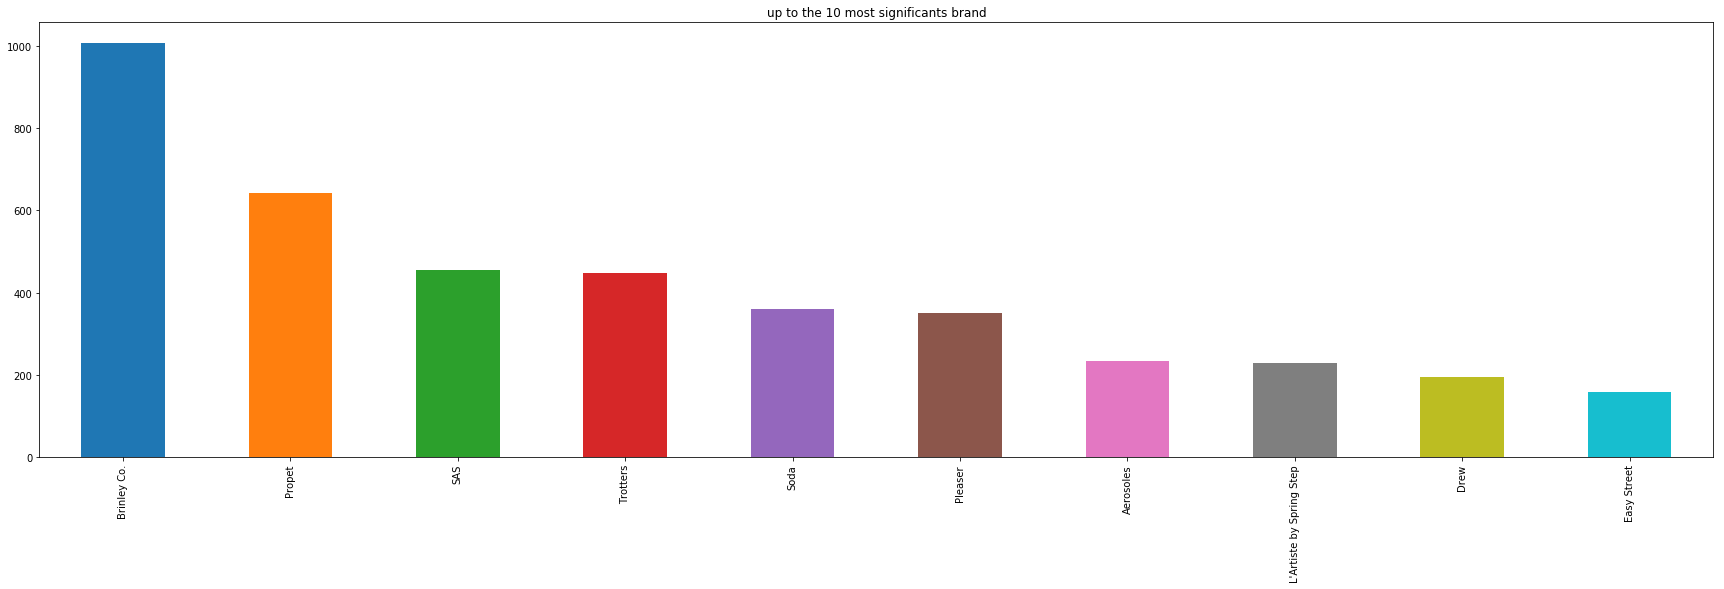

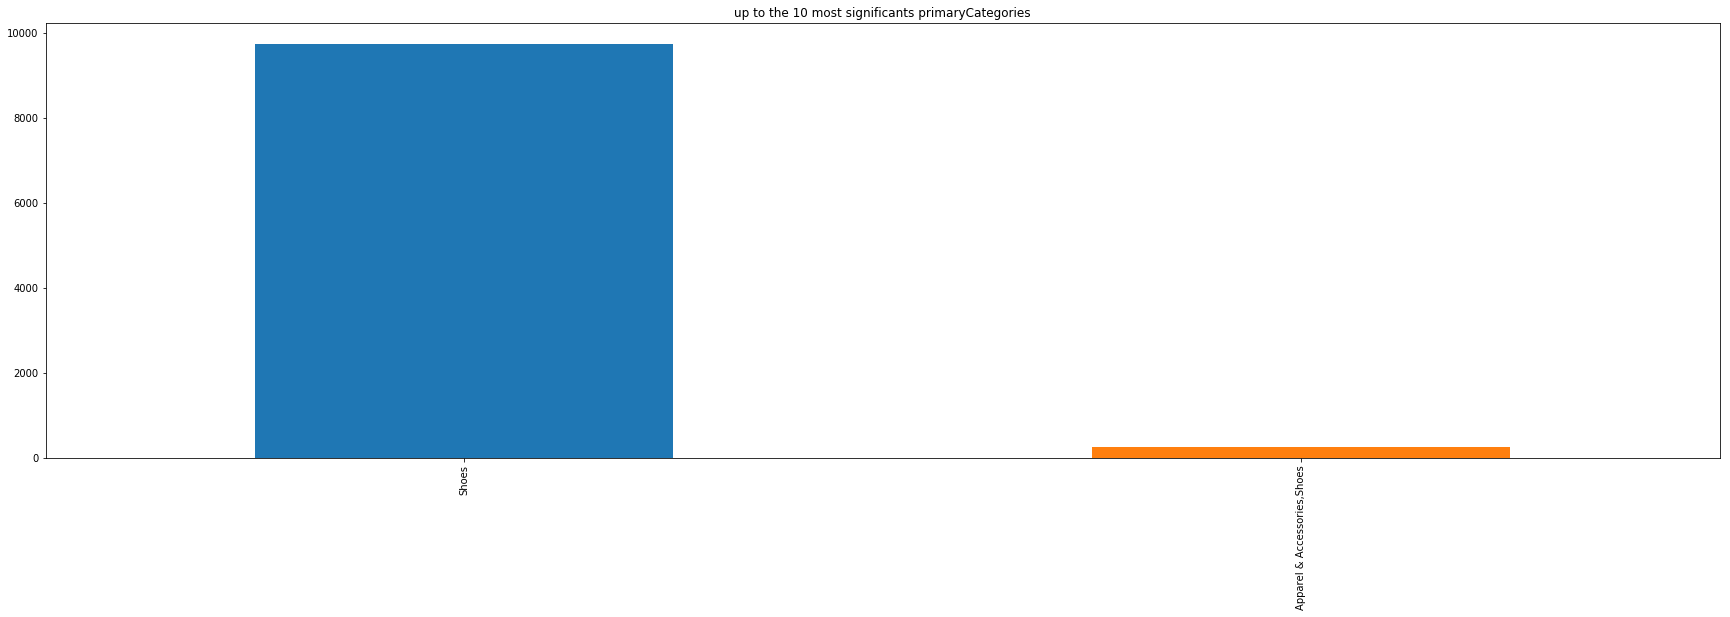

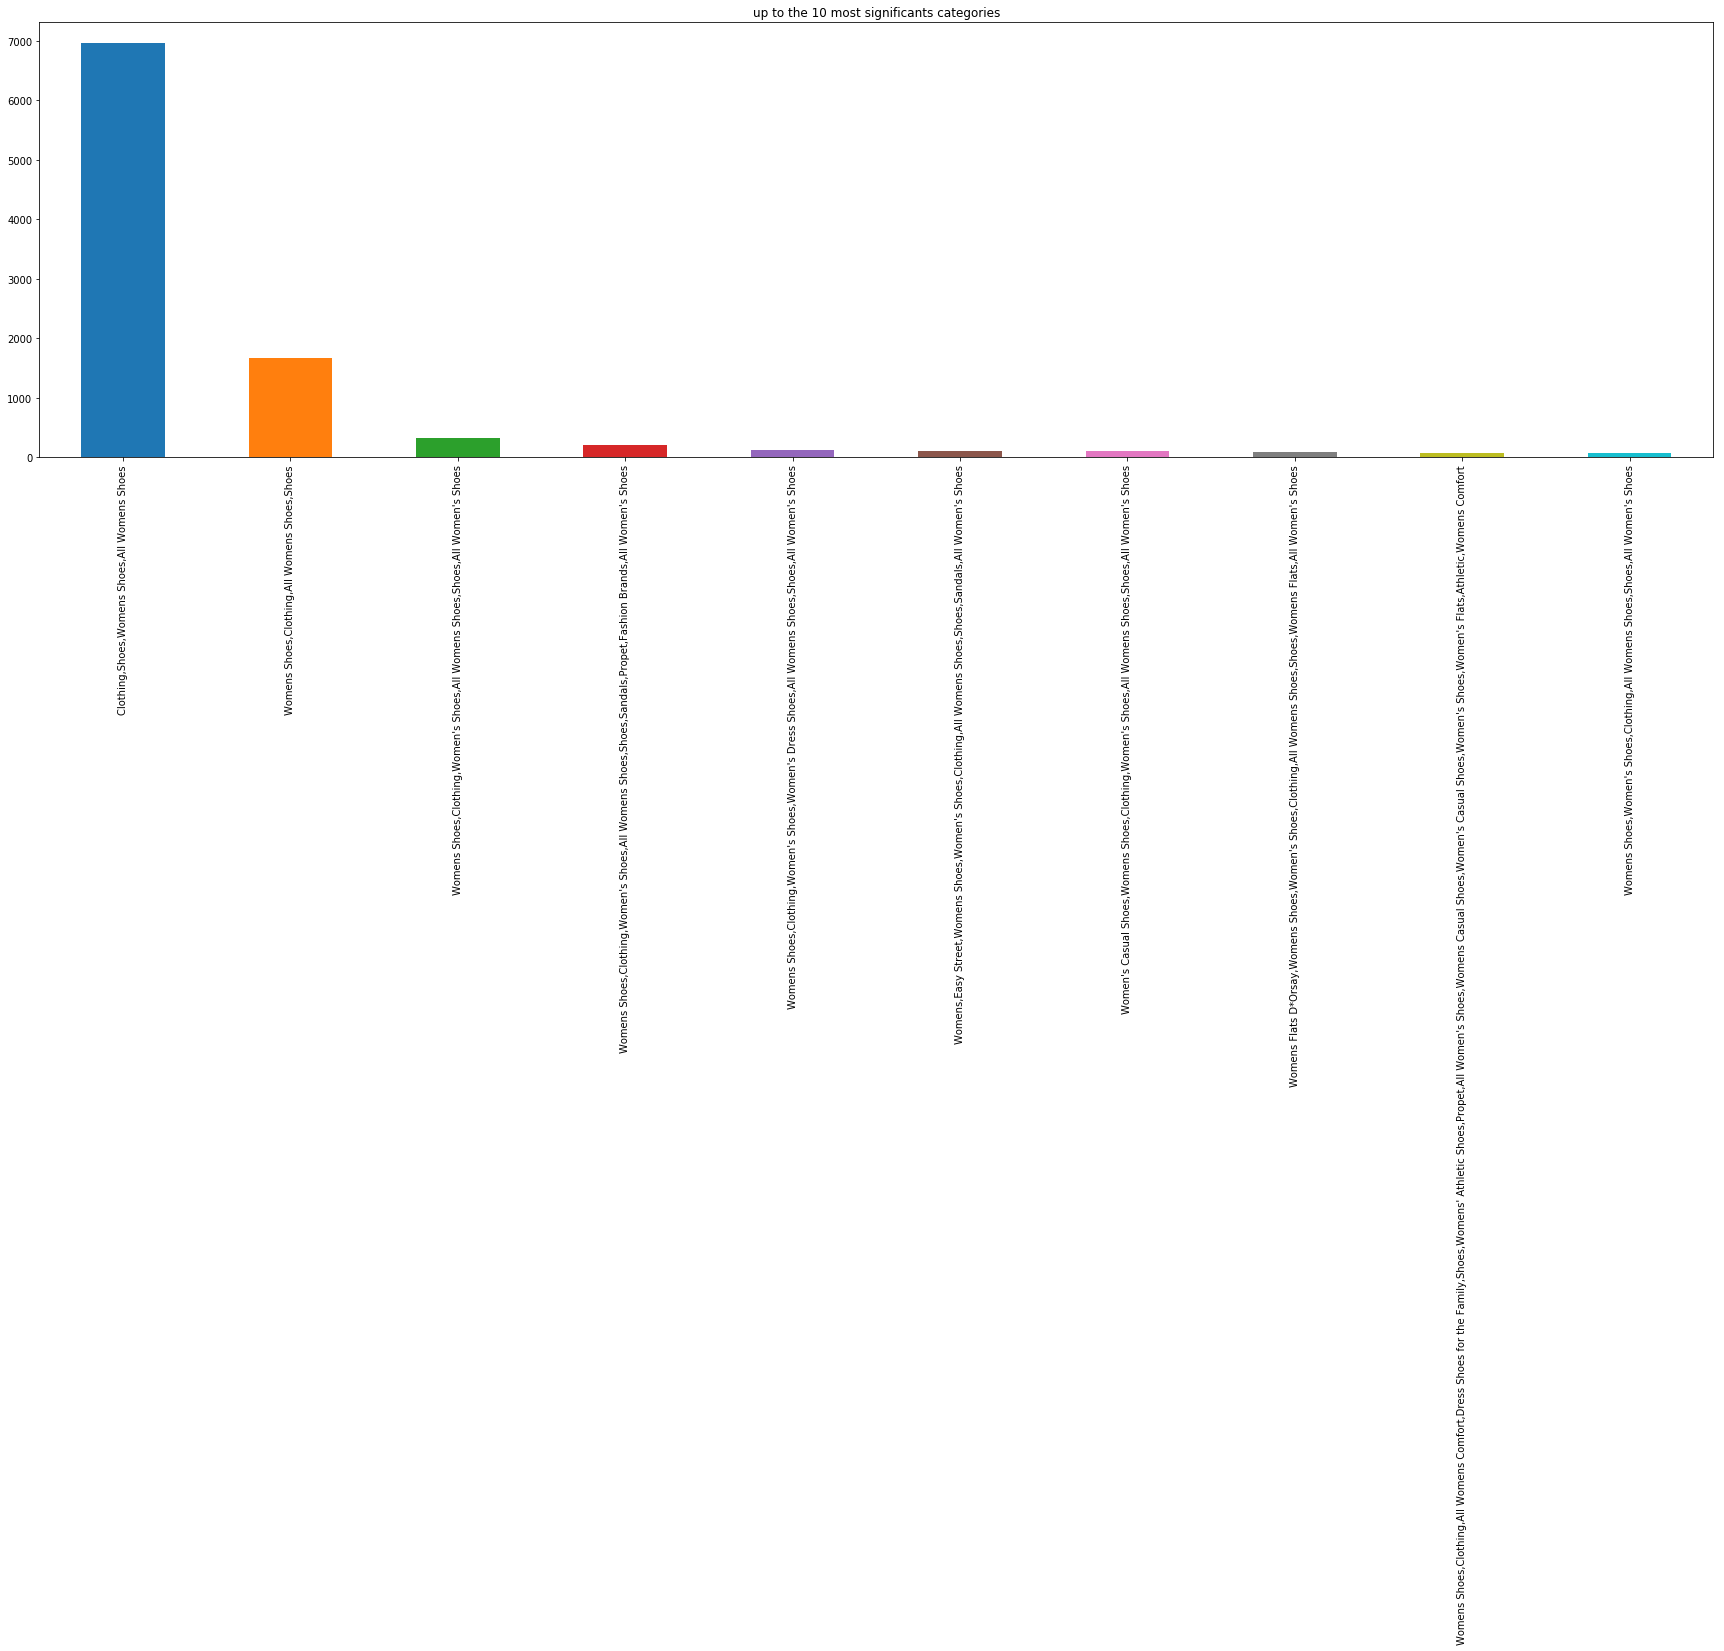

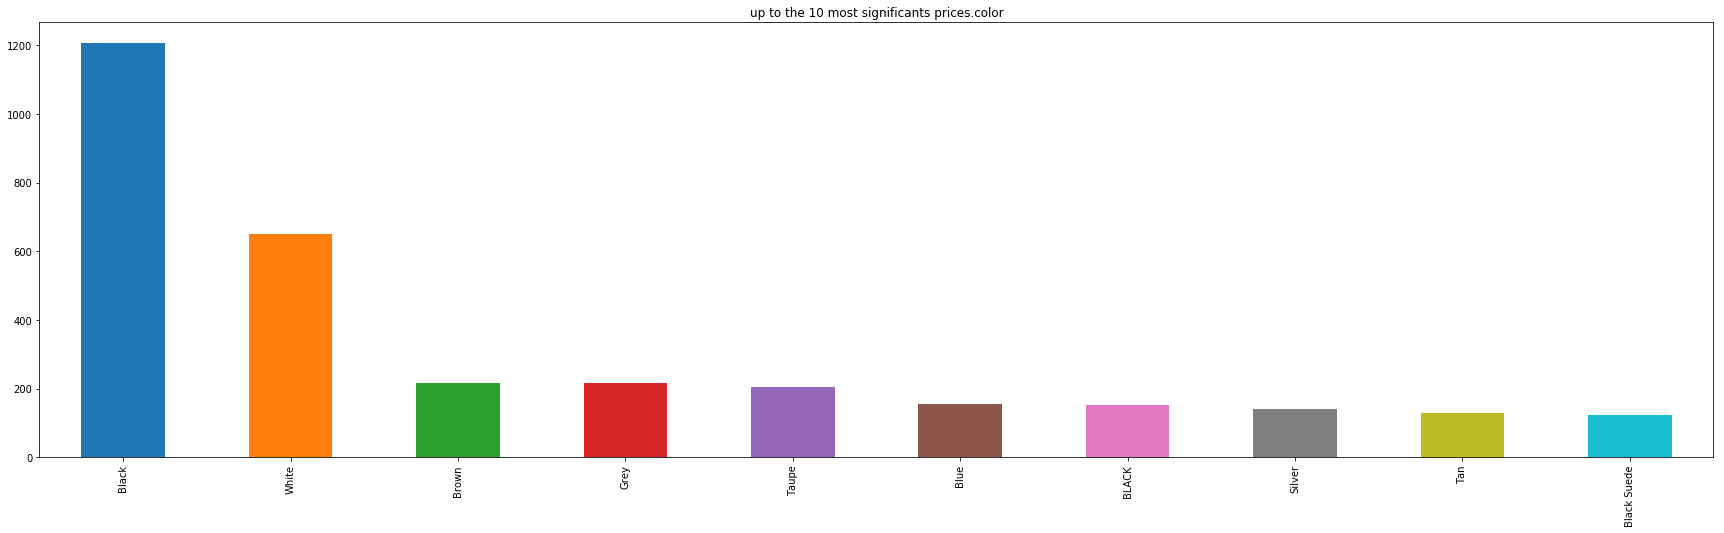

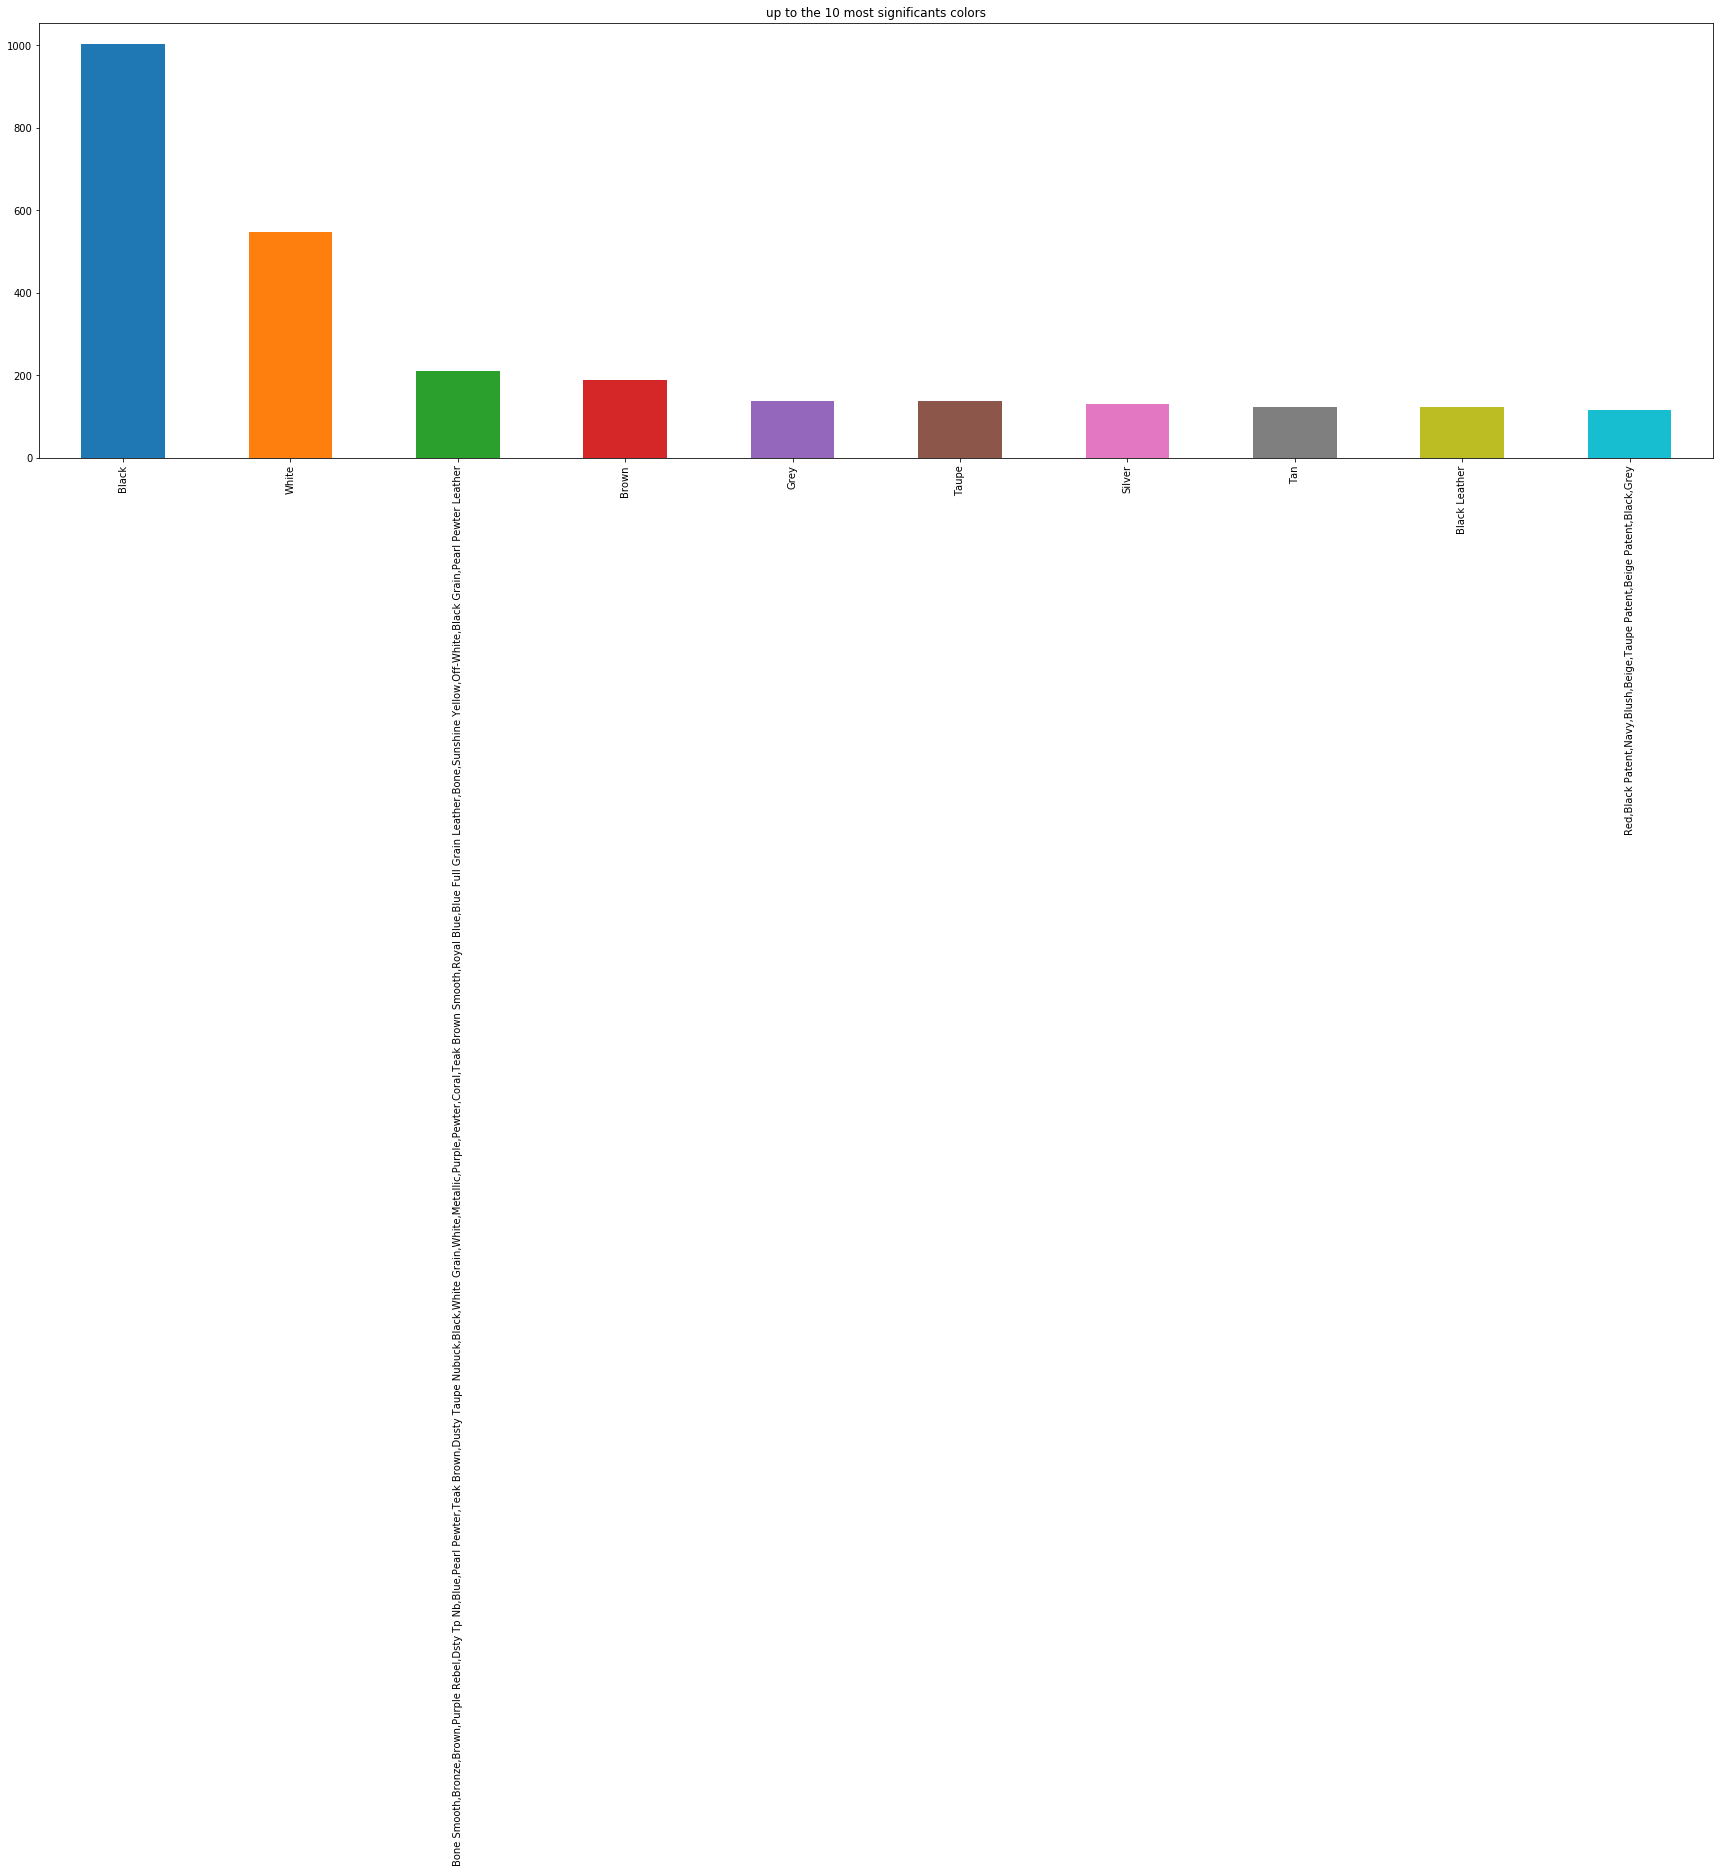

In [15]:
for item in categorical:
    name, vals = categorical_data(data_fix, item)
    barplot(data_fix, name)
    plt.show()

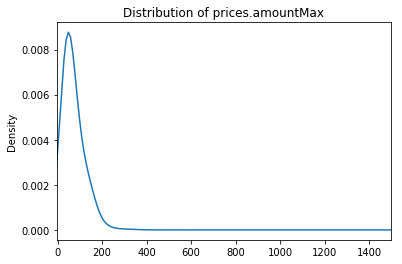

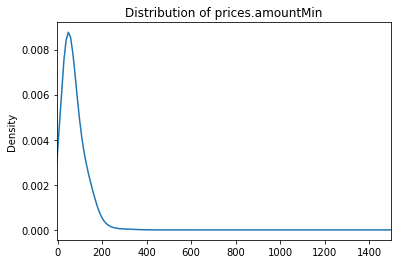

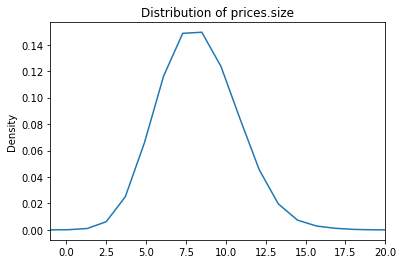

In [16]:
for item in numericals:
    col_name = data_fix.columns[item]
    distPlot(data_fix, col_name)
    plt.show()

#### Annalysis

As you can see in every category there is a very significant top1 and top2. Even thought data is more distributed on the different brands, there is still a very high concentration, as there are 10,000 entries and 1,600 are from only two brands.
* I considered size as a real variable and not a category for this annalysis, because its categories are, in fact, directly related to the values they convey.

The pices do show us there is not focus on shoes that are costly. I think the range found does say that standard shoes were selected and I could not make up any bias from that data, as the distribution soes match what I expected, roughly.


## 3. Most relevante attribute to the understanding

The attribute that really helped understand what the data actually is, surprinsingly enough, was the distribution by brands. This information made me realize that the data concentrated information of standardized shoes (with names, even). Before I thought the focus would be in a few categories where brands would play lesse role than dates and seasons.

## 4. Outlier patterns

I expected the biggest difference from reality to be in the prices, but, to  my surprise, that is not the case. I could not find anything special, but, I the colors sold the most surprised me (not enough to call doubt the sample). I tought I would see much more brown and gray than white or black.

## 5. My remarks

* I did ignore information about the shoe format, and filtered the soze,exclusively
* When plotting the categories, I fixed an upper limit of 10 because it started getting difficult to read at 15, so I rounded to a confortable level (10)
* I did not filter repeated entries when plotting the brands, because I believe the repeated data is imortant to eunderstand the focus of the set
* I did filter repeated entries when plotting the numerical distributions, because to see the distribution I thought an estimate of the item price would suffice. The estimation I did was to simply get the first value on the table, not the mean. I chose this because I think it has a similar result to other methods, and I do not know which one is best
* I ignored entries I did not know how to work with, entries that were mostly blank, as they would not show much of the whole sample, or repeated columns (sizes vs. p_sizes)

## 6. Symmetries

(-5.0, 1000.0)

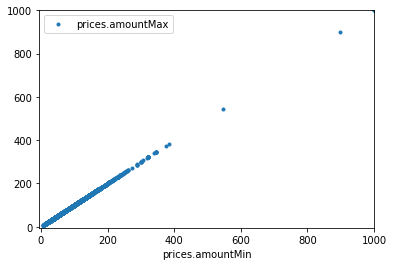

In [17]:
ax = data_fix.plot(x='prices.amountMin', y='prices.amountMax', style='.')
ax.set_xlim(-5.0, 1000.0)
ax.set_ylim(-5.0, 1000.0)

The graph above shows a very clear positive correlation between the maximum and minimum price.

(-5.0, 20.0)

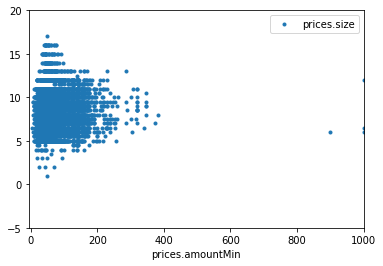

In [18]:
ax = data_fix.plot(x='prices.amountMin', y='prices.size', style='.')
ax.set_xlim(-5.0, 1000.0)
ax.set_ylim(-5.0, 20.0)

This, however, shows that there is no clear correlation between sizes and the cost. It shows, however, other symmetrical information. The price range of small and large shoes is smaller than the size of regular sized shoes. It does make sense, as there is way fewer demand for this sizes, and, as a consequence, much less offer, so there is a smaller price sample. What is not clear is why the price mean is smaller in both cases.

## 7. Importance of EDA to help me understand the dataset

I am very new to data science and this was the first time I spent some hours with a dataset exploring how to handle and compare data. With all honesty, I know there are amazing things and interesting relations that can be found/done. I did not, however, expect it would make a great difference on how I would handle my dataset. I thought it would be something way over my head.

To my surprise, I did find a way to use the things I learned I learned in class. More specifically I had a straight forward approach to this assignment, where I "knew" what I would find. The data, however, did not match what I expected. A few different examples: I expected to get interesting data about manufacturers, but, mostly the data did not exist; I never expected to get anyhting special from brands, but data was, indeed, concentrated on a small set of brands; I though the focus would be on the different categories (flip-flops, sandals, heels, sneakers...), however, the categories meant something completely different.

I would say that EDA helped me refocus on what the data conveyed, and not what I wanted it to bring me.

## QUESTIONS

## Questions to the dataset

Question 1: What is the percentage of shoes which the prices changed?

Question 2: What is the number of shoes which there is difference between the minimum and maximum prices? 

Question 3: What are the months entries count throughout the years?

In [19]:
s1 = len(data_fix.index)
s2 = len(data_fix.groupby("id"))

p = 100 * (1.0 - float(s2)/float(s1))
print("percentage = {0}%".format(p))

percentage = 12.61%


In [20]:
df2 = data_fix.loc[data_fix["prices.amountMax"] - data_fix["prices.amountMin"] > 0.0]
len(df2.index)

0

Month = 1, Count = 0
Month = 2, Count = 1
Month = 3, Count = 1
Month = 4, Count = 1
Month = 5, Count = 5
Month = 6, Count = 25
Month = 7, Count = 34
Month = 8, Count = 107
Month = 9, Count = 282
Month = 10, Count = 412
Month = 11, Count = 737
Month = 12, Count = 8395


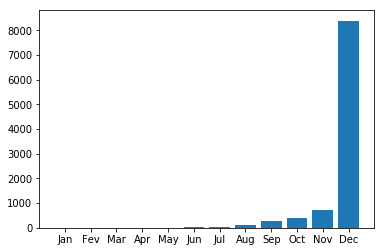

In [21]:
a = [0 for i in range(12)]
for i in range(12):
    b = str(i+1)
    if (len(b) == 1): b = '0' + b
    a[i] = data_fix.loc[data_fix["dateAdded"].str[5:7] == b]
c = [0 for i in range(12)]
for i in range(12):
    c[i] = len(a[i].index)
c.sort()
for i in range(12):
    print("Month = {0}, Count = {1}".format(i+1, c[i]))
x = np.arange(12)
plt.bar(x, c)
plt.xticks(x, ('Jan', 'Fev', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
plt.show()

I believe my questions show that the sample is very biased.
1. Almost all the shoe models were introduced in December
2. All the shoes have no difference between their minimum and maximum price